In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.style as style
import seaborn as sns
style.use('seaborn')
sns.set_style(style='darkgrid')
import numpy as np
import pandas as pd
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import gensim 
import gensim.downloader as api
from gensim.models import Word2Vec 
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from MulticoreTSNE import MulticoreTSNE as MultiTSNE
import timeit
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
with open('data/tsne_matrix_10000_perplex_50.pkl', 'rb') as f:
    X = pickle.load(f)

In [3]:
subreddits = pd.read_csv('data/allsubreddits_10000.csv')
subreddits = subreddits['subreddit']

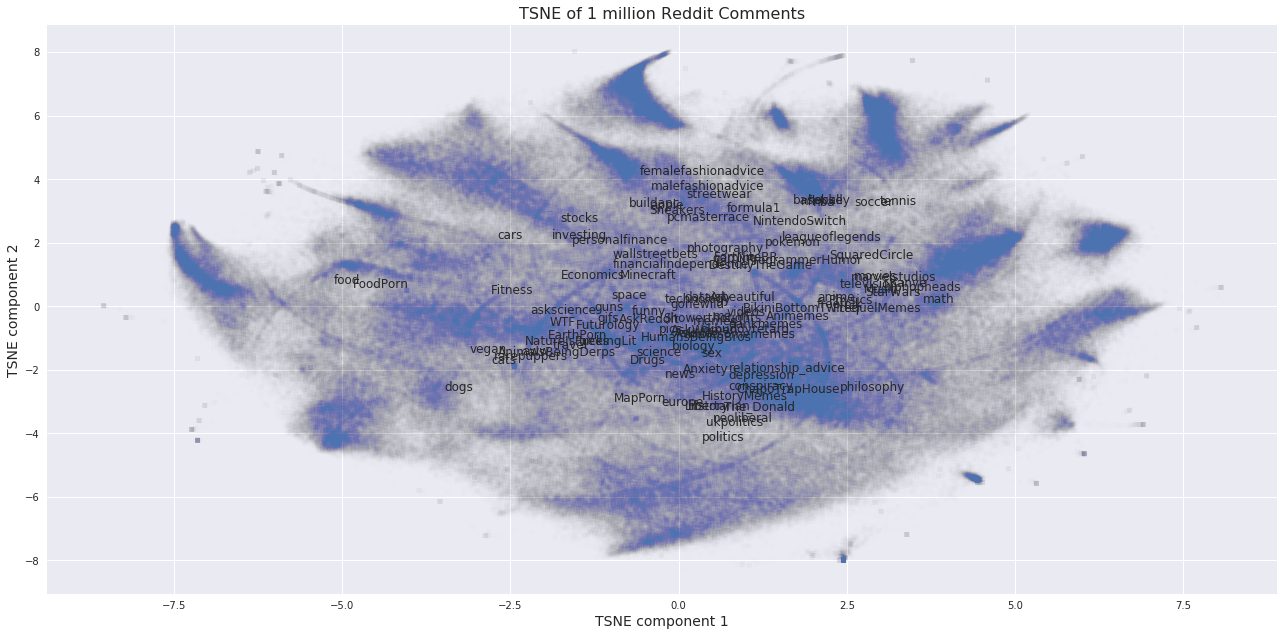

In [4]:
matplotlib.rcParams.update({'font.size': 12})
fig, ax = plt.subplots()
fig.set_size_inches(18, 9)
ax.scatter(X[:,0],X[:,1],alpha=0.002,s=35)
for i in sorted(np.unique(subreddits),key=str.casefold):
    ax.scatter(np.mean(X[np.where(subreddits==i)][:,0]),np.mean(X[np.where(subreddits==i)][:,1]),color='k',alpha=0) 
    ax.annotate(i,xy=(np.mean(X[np.where(subreddits==i)][:,0]), np.mean(X[np.where(subreddits==i)][:,1])))
ax.set_title('TSNE of 1 million Reddit Comments', {'fontsize': 16})
ax.set_xlabel('TSNE component 1', {'fontsize': 14})
ax.set_ylabel('TSNE component 2', {'fontsize': 14})
plt.tight_layout()
fig.savefig('plots/tsne_w_subreddit_means.png', dpi=640)

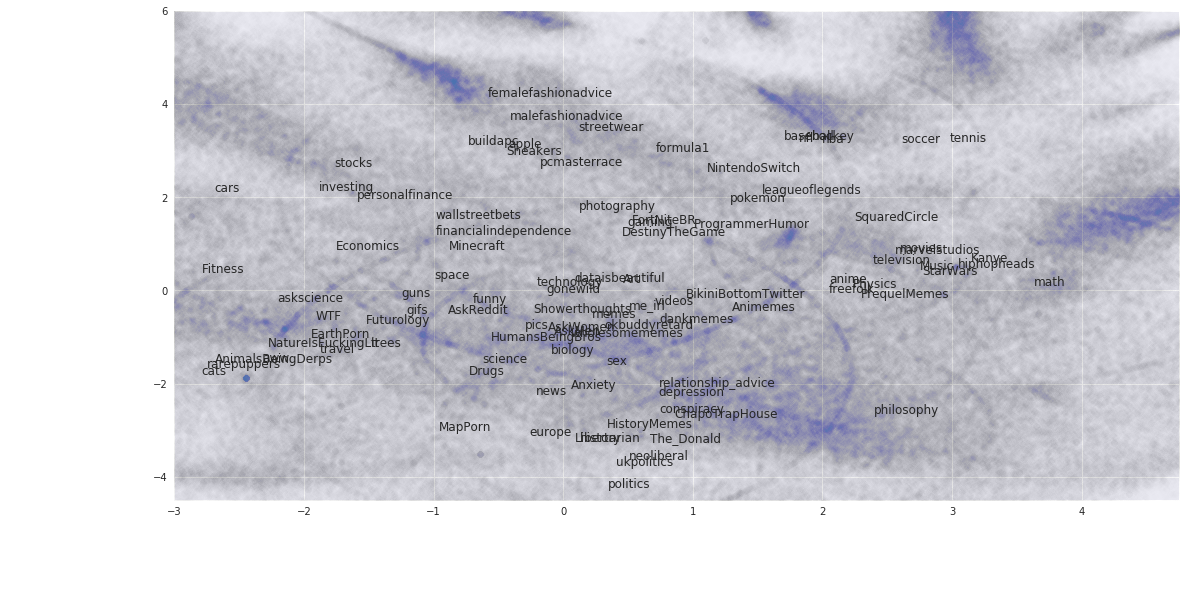

In [16]:
matplotlib.rcParams.update({'font.size': 12})
fig, ax = plt.subplots()
fig.set_size_inches(18, 9)
ax.scatter(X[:,0],X[:,1],alpha=0.002)
for i in sorted(np.unique(subreddits),key=str.casefold):
    ax.scatter(np.mean(X[np.where(subreddits==i)][:,0]),np.mean(X[np.where(subreddits==i)][:,1]),color='k',alpha=0) 
    ax.annotate(i,xy=(np.mean(X[np.where(subreddits==i)][:,0]), np.mean(X[np.where(subreddits==i)][:,1])))
ax.set_xlim(-3,4.75)
ax.set_ylim(-4.5,6)
fig.savefig('plots/tsne_w_subreddit_means_zoomed.png', dpi=640)

In [24]:
X = X[0:-1:10]

In [33]:
scores = []
for n_clusters in np.arange(2,61):
    start_time = timeit.default_timer()
    clusterer = KMeans(n_clusters=n_clusters, verbose=1, n_jobs=-1, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, random_state=1)
    scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    print((timeit.default_timer() - start_time)/60,'minutes')

For n_clusters = 2 The average silhouette_score is : 0.3439681570606285
1.7362807202332382 minutes
For n_clusters = 3 The average silhouette_score is : 0.37793422230733575
1.630067105449901 minutes
For n_clusters = 4 The average silhouette_score is : 0.36828083984089466
1.546522960333338 minutes
For n_clusters = 5 The average silhouette_score is : 0.3561481038540163
1.5233525319168015 minutes
For n_clusters = 6 The average silhouette_score is : 0.37103390256854174
1.935068596566513 minutes
For n_clusters = 7 The average silhouette_score is : 0.3694113246469998
1.8255696444832816 minutes
For n_clusters = 8 The average silhouette_score is : 0.3717583413371483
2.30994246186674 minutes
For n_clusters = 9 The average silhouette_score is : 0.3766045959637018
2.2633765178000127 minutes
For n_clusters = 10 The average silhouette_score is : 0.3746954522018904
2.4643475376333908 minutes
For n_clusters = 11 The average silhouette_score is : 0.3746234759533722
1.7061513749334456 minutes
For n_clus

In [37]:
for n_clusters in np.arange(61,101):
    start_time = timeit.default_timer()
    clusterer = KMeans(n_clusters=n_clusters, verbose=1, n_jobs=-1, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, random_state=1)
    scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    print((timeit.default_timer() - start_time)/60,'minutes')

For n_clusters = 61 The average silhouette_score is : 0.3578424551571589
2.133935915750044 minutes
For n_clusters = 62 The average silhouette_score is : 0.35655419716140363
2.470810870416608 minutes
For n_clusters = 63 The average silhouette_score is : 0.3552770209317189
1.786392110266752 minutes
For n_clusters = 64 The average silhouette_score is : 0.35497431248876876
2.592297451049914 minutes
For n_clusters = 65 The average silhouette_score is : 0.3543854451165483
2.3967054714167415 minutes
For n_clusters = 66 The average silhouette_score is : 0.35060899029513565
2.085325856766576 minutes
For n_clusters = 67 The average silhouette_score is : 0.35079831249617255
2.099315773300138 minutes
For n_clusters = 68 The average silhouette_score is : 0.3500659405912243
2.136566816349902 minutes
For n_clusters = 69 The average silhouette_score is : 0.3508701407812135
2.044699660250141 minutes
For n_clusters = 70 The average silhouette_score is : 0.3496512472007573
2.157840636116695 minutes
For n

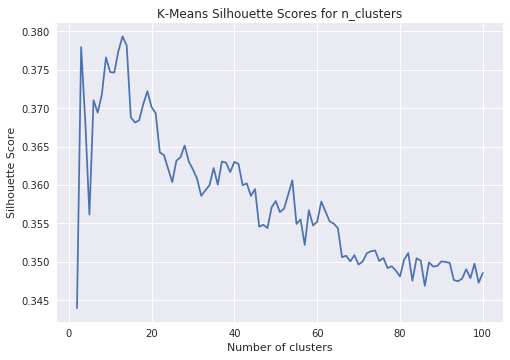

In [38]:
fig, ax = plt.subplots()
ax.plot(np.arange(2,101),scores)
ax.set_title('K-Means Silhouette Scores for n_clusters')
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Silhouette Score')
fig.savefig('plots/silhouette_scores.png', dpi=640)

For n_clusters = 13 The average silhouette_score is : 0.3793335409732287
4.5342102977667915 minutes
For n_clusters = 19 The average silhouette_score is : 0.3722053898879523
4.120043669783384 minutes
For n_clusters = 28 The average silhouette_score is : 0.3651362990295154
4.2098085981500235 minutes
For n_clusters = 54 The average silhouette_score is : 0.36060393891036585
4.751782192149888 minutes
For n_clusters = 61 The average silhouette_score is : 0.3578424551571589
4.758582898816773 minutes


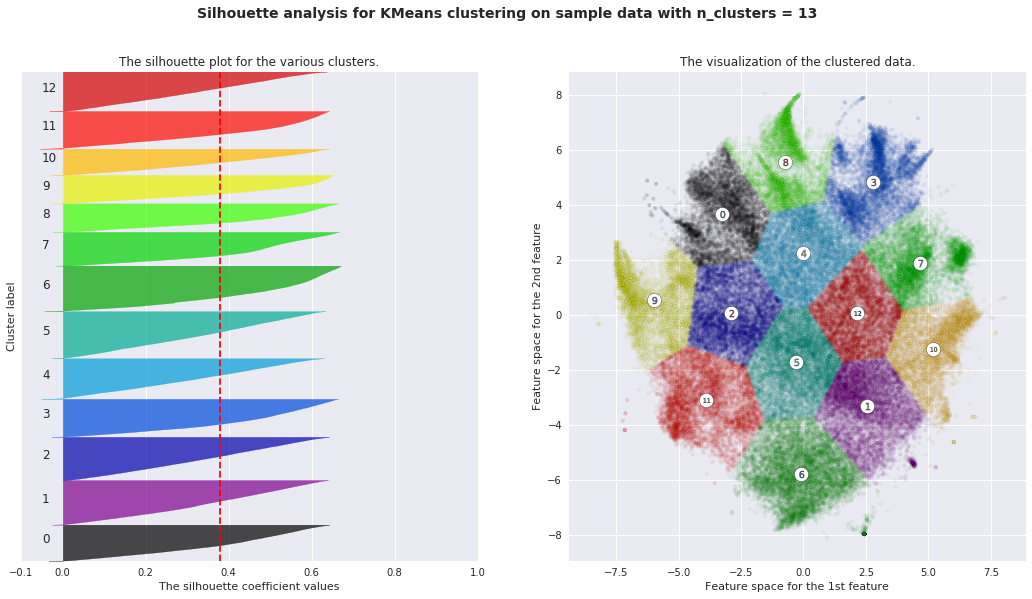

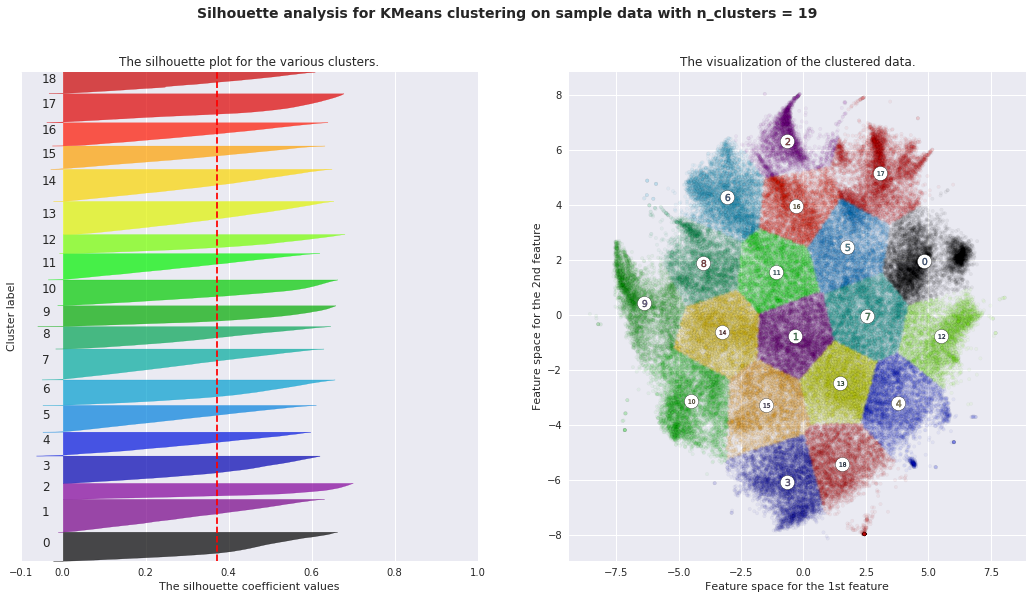

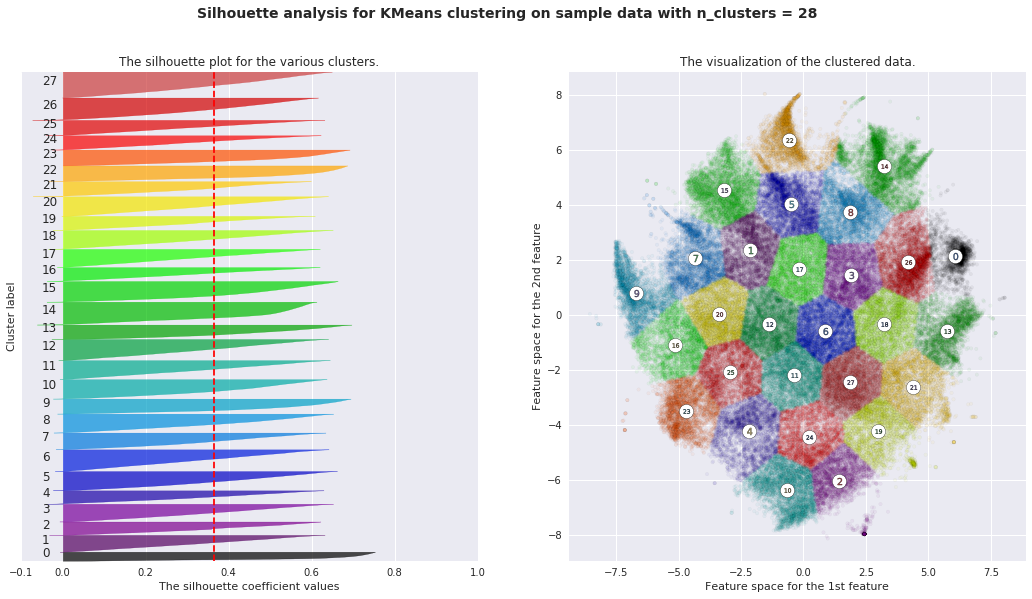

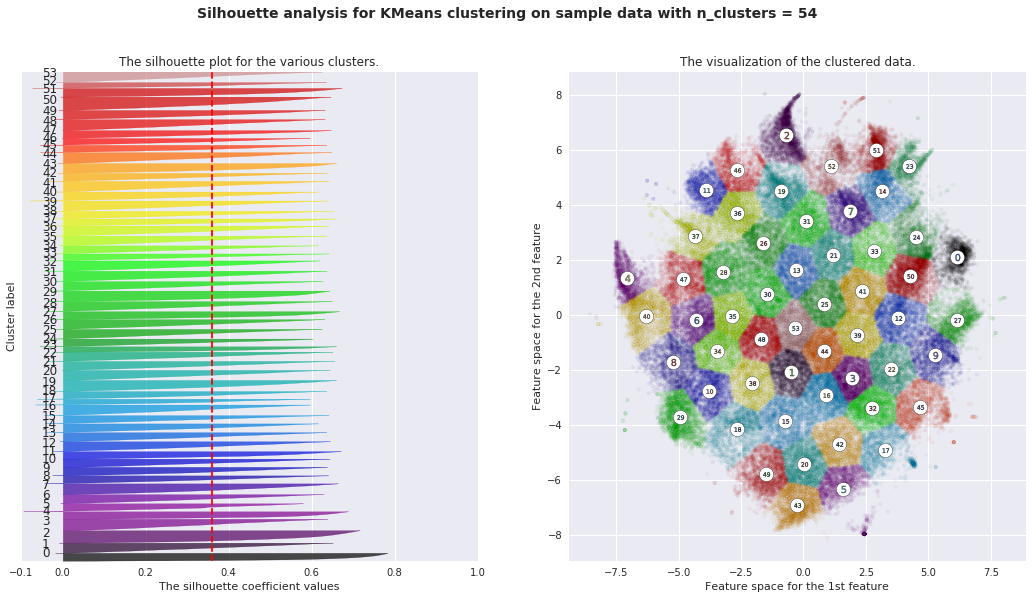

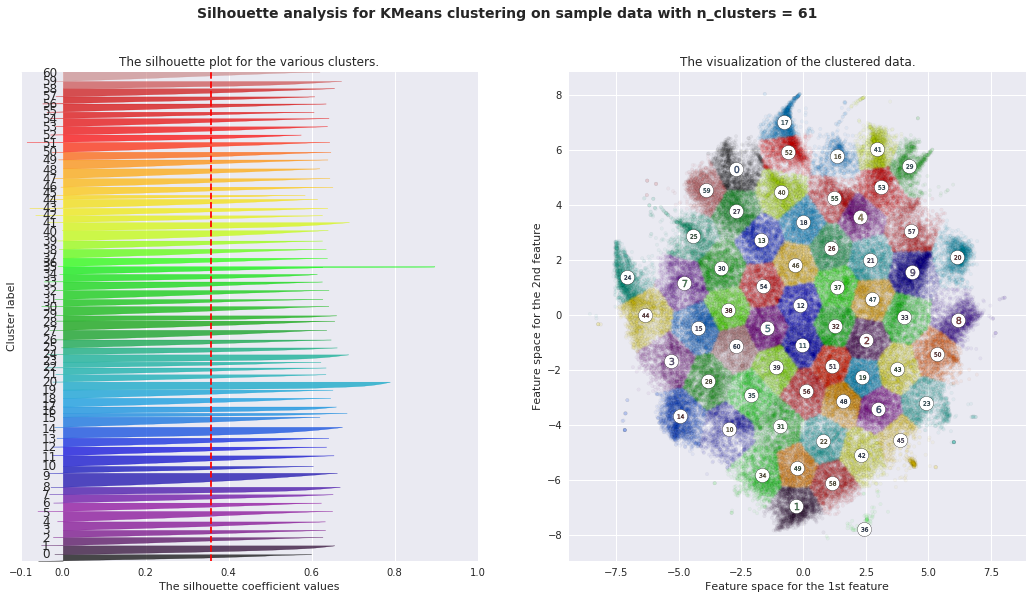

In [41]:
for n_clusters in [13,19,28,54,61]:
    start_time = timeit.default_timer()
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1,2)
    fig.set_size_inches(18, 9)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, verbose=1, n_jobs=-1, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels, random_state=1)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', alpha=0.05,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.savefig('plots/kmeans'+str(n_clusters)+'.png', dpi=640)
    print((timeit.default_timer() - start_time)/60,'minutes')